In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement 
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

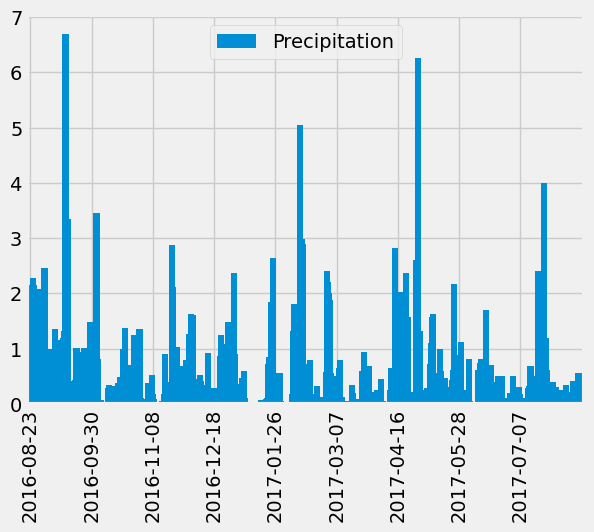

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
past_year = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year).all()
#past_year

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(past_year)
prcp_df = prcp_df.rename(columns={"date": "Date", "prcp":"Precipitation"})
#prcp_df.head()

# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by = ["Date"])
#prcp_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
#Add x and y labels??
plot = prcp_df.plot(kind='bar', alpha=1, width=25, grid=True)
plt.locator_params(axis='x', nbins=9)
plt.ylabel = ("Inches")
plt.xlabel = ("Date")
plot.set_xticklabels(prcp_df["Date"], rotation='vertical')
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
#Are these the requested stats??
print(prcp_df['Precipitation'].mean())
print(prcp_df['Precipitation'].median())
print(prcp_df['Precipitation'].mode())

0.17727857496288968
0.02
0    0.0
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).count()

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.tobs)).\
             group_by(Measurement.station).\
             order_by(func.count(Measurement.tobs).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),
             func.max(Measurement.tobs),
             func.avg(Measurement.tobs)).\
             filter(Measurement.station =='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_all = session.query(Measurement.station, Measurement.tobs, Measurement.date).\
              order_by(Measurement.date.desc()).\
              filter(Measurement.station =='USC00519281').all()
year = dt.date(2017, 8, 18) - dt.timedelta(days=365)
station_year = session.query(Measurement.station, Measurement.tobs, Measurement.date).\
               filter(Measurement.date <= year, Measurement.station =='USC00519281').all()
station_year

[('USC00519281', 70.0, '2010-01-01'),
 ('USC00519281', 62.0, '2010-01-02'),
 ('USC00519281', 74.0, '2010-01-03'),
 ('USC00519281', 75.0, '2010-01-04'),
 ('USC00519281', 74.0, '2010-01-05'),
 ('USC00519281', 76.0, '2010-01-06'),
 ('USC00519281', 69.0, '2010-01-07'),
 ('USC00519281', 66.0, '2010-01-08'),
 ('USC00519281', 70.0, '2010-01-09'),
 ('USC00519281', 75.0, '2010-01-10'),
 ('USC00519281', 64.0, '2010-01-11'),
 ('USC00519281', 60.0, '2010-01-12'),
 ('USC00519281', 61.0, '2010-01-13'),
 ('USC00519281', 68.0, '2010-01-14'),
 ('USC00519281', 64.0, '2010-01-15'),
 ('USC00519281', 66.0, '2010-01-16'),
 ('USC00519281', 67.0, '2010-01-17'),
 ('USC00519281', 70.0, '2010-01-18'),
 ('USC00519281', 67.0, '2010-01-19'),
 ('USC00519281', 67.0, '2010-01-20'),
 ('USC00519281', 69.0, '2010-01-21'),
 ('USC00519281', 60.0, '2010-01-22'),
 ('USC00519281', 75.0, '2010-01-23'),
 ('USC00519281', 75.0, '2010-01-24'),
 ('USC00519281', 65.0, '2010-01-25'),
 ('USC00519281', 75.0, '2010-01-26'),
 ('USC005192

# Close Session

In [16]:
# Close Session
session.close()